### Cricketer Image Classification: Data Cleaning

In [1]:
import numpy as np 
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os 
import shutil 
import sys

When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it?

In [2]:
## reading the image using cv2 library 
img = cv2.imread('test ms dhoni.jpg')
img.shape

(612, 408, 3)

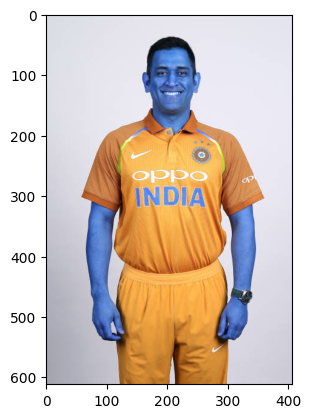

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

In [5]:
## representation of gray colors using the rgb indexes from 0 to 255 
gray

array([[222, 222, 222, ..., 231, 231, 231],
       [222, 222, 222, ..., 231, 231, 231],
       [222, 222, 222, ..., 231, 231, 231],
       ...,
       [167, 167, 167, ..., 206, 206, 206],
       [167, 167, 167, ..., 206, 206, 206],
       [167, 167, 167, ..., 206, 206, 206]], dtype=uint8)

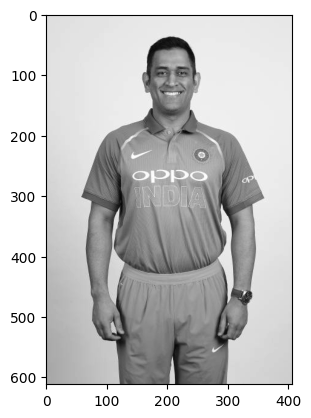

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[159,  58, 100, 100]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(159, 58, 100, 100)

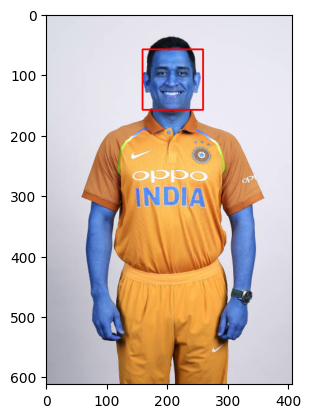

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

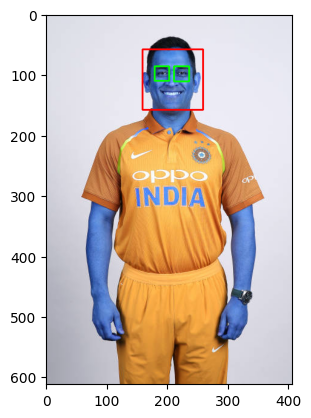

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w] ## here roi is region of intrest 
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Preprocessing: Crop the facial region of the image

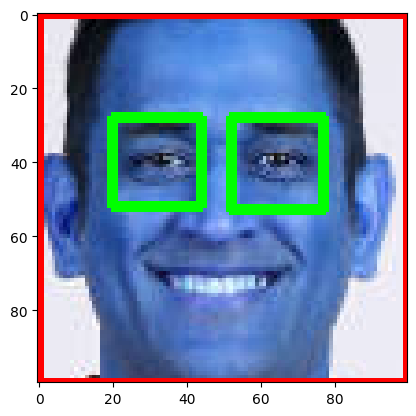

In [11]:

%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(100, 100, 3)

In [13]:
## function to face in the image if the eyes in the  image seen clear
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load the image.")
    else:
    # Continue with further processing
        gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
        face = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in face:
            roi_gray = gray[y:y+h, x:x+w] ## here roi is region of intrest 
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)==0:
                return 0
            elif len(eyes>=2):
                return roi_color

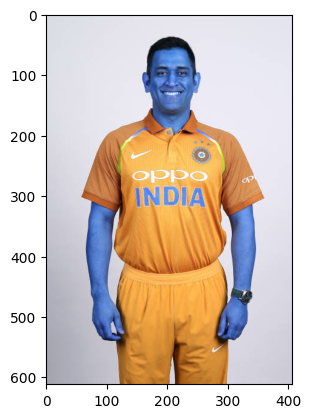

In [14]:
original_image = cv2.imread('test ms dhoni.jpg')
plt.imshow(original_image)

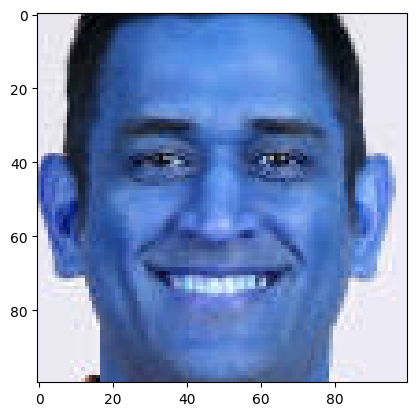

In [15]:
cropped_image = get_cropped_image_if_2_eyes('test ms dhoni.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [17]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

In [18]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
## storing path of dataset containing sub-directories
img_dirs

['./dataset/MS_Dhoni',
 './dataset/Rohit_Sharma',
 './dataset/Ruturaj_Gaikwad',
 './dataset/Suresh_Raina',
 './dataset/Virat_Kohli']

In [20]:
## create new directory cropped 
os.mkdir(path_to_cr_data) 

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/MS_Dhoni
Error: Unable to load the image.
Error: Unable to load the image.
Generating cropped images in folder:  ./dataset/cropped/Rohit_Sharma
Error: Unable to load the image.
Generating cropped images in folder:  ./dataset/cropped/Ruturaj_Gaikwad
Generating cropped images in folder:  ./dataset/cropped/Suresh_Raina
Error: Unable to load the image.
Generating cropped images in folder:  ./dataset/cropped/Virat_Kohli


In [46]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'MS_Dhoni': ['./dataset/cropped/MS_Dhoni\\MS_Dhoni11.png',
  './dataset/cropped/MS_Dhoni\\MS_Dhoni13.png',
  './dataset/cropped/MS_Dhoni\\MS_Dhoni2.png',
  './dataset/cropped/MS_Dhoni\\MS_Dhoni3.png',
  './dataset/cropped/MS_Dhoni\\MS_Dhoni4.png',
  './dataset/cropped/MS_Dhoni\\MS_Dhoni6.png',
  './dataset/cropped/MS_Dhoni\\MS_Dhoni7.png',
  './dataset/cropped/MS_Dhoni\\MS_Dhoni8.png'],
 'Rohit_Sharma': ['./dataset/cropped/Rohit_Sharma\\Rohit_Sharma10.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma12.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma13.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma14.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma15.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma16.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma17.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma19.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma2.png',
  './dataset/cropped/Rohit_Sharma\\Rohit_Sharma20.png',
  './dataset/cropped/Rohit_Sharma\

### Preprocessing: Use wavelet transform as a feature for traning our model

### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
## Wavelet transform

In [47]:

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = cropped_image
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


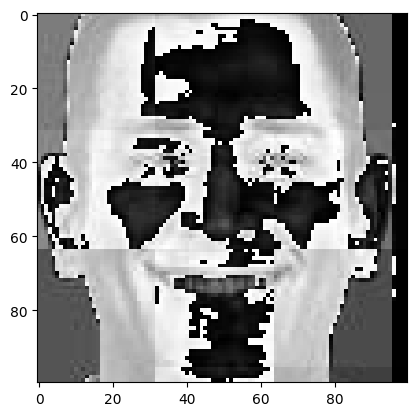

In [48]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')


In [49]:
## to assign number for each celebrity

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'MS_Dhoni': 0,
 'Rohit_Sharma': 1,
 'Ruturaj_Gaikwad': 2,
 'Suresh_Raina': 3,
 'Virat_Kohli': 4}

In [50]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [51]:
len(X[0])


4096

In [52]:
## convert to float and reshape it . This can be important for certain numerical operations and compatibility with other functions that expect floating-point numbers
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(62, 4096)

### Training a model using above data 

In [53]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3, random_state=0)

In [55]:
X_train.shape

(43, 4096)

In [56]:
len(X_test)

19

In [57]:
## creating a pipeline to scale data and fit model into it 
pipeline = Pipeline([
    ('Scalar',StandardScaler()),
    ('svc', SVC(kernel = 'rbf', C = 10))
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.3157894736842105

## Hyper Parameter tunning using grid search cv

In [58]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [59]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipeline = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipeline, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.558333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.419444,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.450000,{'logisticregression__C': 1}


In [60]:
best_clf = best_estimators['svm']

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 2, 0, 1, 0],
       [0, 2, 0, 0, 0],
       [1, 0, 3, 0, 0],
       [0, 2, 0, 1, 2],
       [2, 0, 1, 0, 2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

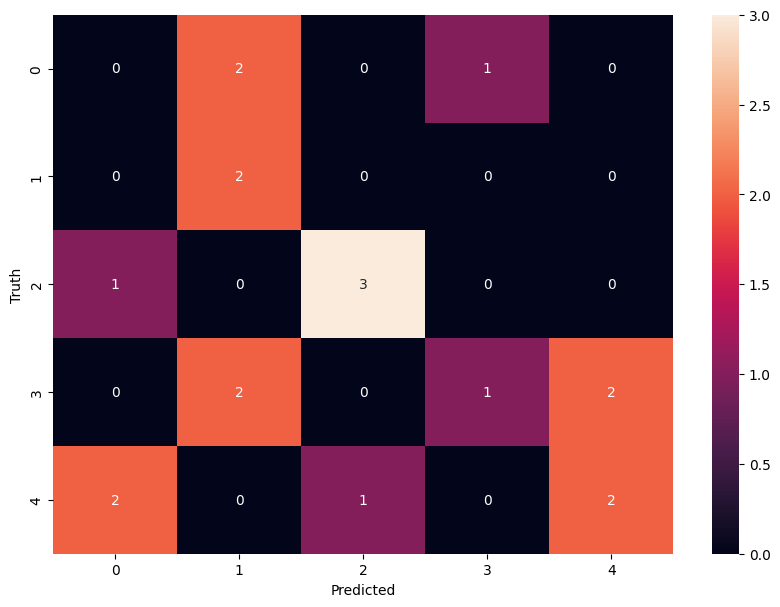

In [62]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')